# Predicción de Calidad del Vino (Core)

In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [102]:
# Descargo el data set
path = "/content/drive/MyDrive/Bootcamp/BBDD/WineQT.csv"
df = pd.read_csv(path)

In [103]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


* Se observa que no hay datos faltantes en las columnas.
* Tampoco hay variables categóricas, sólo numéricas.

In [105]:
# Reviso si hay valores nulos
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


# ° No se observan datos nulos

In [106]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.31,1.75,4.60,7.10,7.90,9.10,15.90
volatile acidity,1143.0,0.53,0.18,0.12,0.39,0.52,0.64,1.58
citric acid,1143.0,0.27,0.20,0.00,0.09,0.25,0.42,1.00
residual sugar,1143.0,2.53,1.36,0.90,1.90,2.20,2.60,15.50
chlorides,1143.0,0.09,0.05,0.01,0.07,0.08,0.09,0.61
free sulfur dioxide,1143.0,15.62,10.25,1.00,7.00,13.00,21.00,68.00
total sulfur dioxide,1143.0,45.91,32.78,6.00,21.00,37.00,61.00,289.00
density,1143.0,1.00,0.00,0.99,1.00,1.00,1.00,1.00
pH,1143.0,3.31,0.16,2.74,3.20,3.31,3.40,4.01
sulphates,1143.0,0.66,0.17,0.33,0.55,0.62,0.73,2.00


* Al utilizar.describe() vemos que la columna Id no es util para el análisis por lo que la eliminaré.
* Llama la atención que tanto la columna "free sulfur dioxide" y "total sulfur dioxide" tiene valores máximos bastante alejados del quintil 75% lo que nos puede indicar que posee outliers, además esta hipótesis también la podemos sustentar en que la desviación estándar es bastante alta en ambos casos.

In [107]:
# Elimino la columna Id y hago copia del dataframe
df = df.drop('Id', axis=1)
df_clean = df.copy()

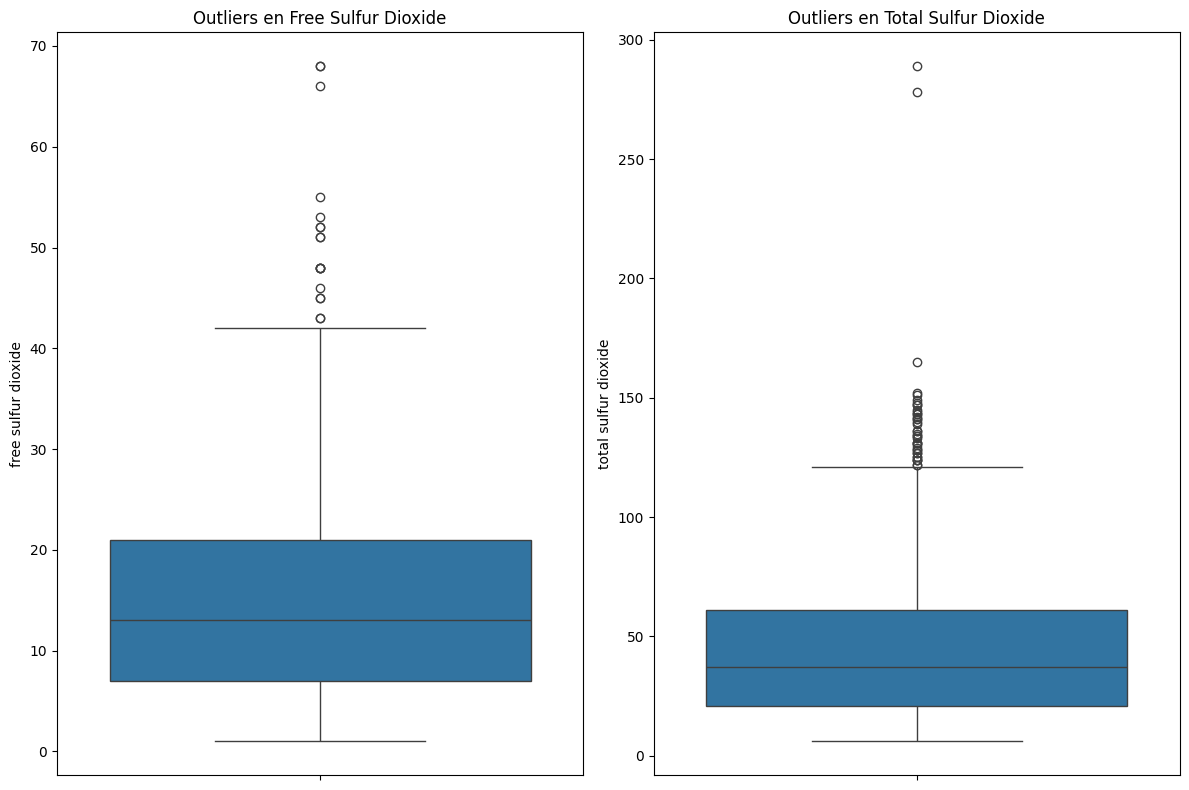

In [108]:
# Boxplots para visualizar outliers en las columnas "free sulfur dioxide" y "total sulfur dioxide"
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='free sulfur dioxide')
plt.title('Outliers en Free Sulfur Dioxide')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='total sulfur dioxide')
plt.title('Outliers en Total Sulfur Dioxide')

plt.tight_layout()
plt.show()

* Podemos ver que efectivamente hay bastantes datos outliers, por lo que procederé a evaluar si conviene eliminarlos de mi data o es riesgoso por posible disminución drástica de mis datos.

In [109]:
columnas_problematicas = ['free sulfur dioxide', 'total sulfur dioxide']
df_tratado_selectivo = tratar_outliers_selectivo(df, columnas_problematicas)

In [110]:
# Evalúo cuántos datos perdería si los elimino
def eliminar_outliers(df, columnas):
    df_filtrado = df.copy()
    for col in columnas:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lim_inf = Q1 - 1.5 * IQR
        lim_sup = Q3 + 1.5 * IQR
        df_filtrado = df_filtrado[(df_filtrado[col] >= lim_inf) & (df_filtrado[col] <= lim_sup)]
    return df_filtrado

df_sin_outliers = eliminar_outliers(df, columnas_problematicas)

print(f"Filas originales: {df.shape[0]}")
print(f"Filas después de eliminar outliers: {df_sin_outliers.shape[0]}")
print(f"Pérdida de datos: {((df.shape[0] - df_sin_outliers.shape[0]) / df.shape[0]) * 100:.1f}%")


Filas originales: 1143
Filas después de eliminar outliers: 1087
Pérdida de datos: 4.9%


* Como es un 4.9% de los datos que se perderían,  decidí hacer capping para que sea menos drástico y así poder ajustar los valores extremos.

In [111]:
def aplicar_capping(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    df_capped = df.copy()
    df_capped[col] = np.where(df[col] < limite_inferior, limite_inferior,
                              np.where(df[col] > limite_superior, limite_superior, df[col]))
    return df_capped

def tratar_outliers_selectivo(df, columnas):
    df_capped = df.copy()
    for col in columnas:
        df_capped = aplicar_capping(df_capped, col)
    return df_capped

In [112]:
# Aplico .describe() para ver cómo quedan las estadisticas descriptivas y verificar los cambios
columnas_problematicas = ['free sulfur dioxide', 'total sulfur dioxide']
print(" Estadística descriptiva después de tratar los outliers:")
display(df_tratado_selectivo[columnas_problematicas].describe().T.round(2))

 Estadística descriptiva después de tratar los outliers:


,count,mean,std,min,25%,50%,75%,max
free sulfur dioxide,1143.0,15.46,9.73,1.0,7.0,13.0,21.0,42.0
total sulfur dioxide,1143.0,45.13,29.97,6.0,21.0,37.0,61.0,121.0


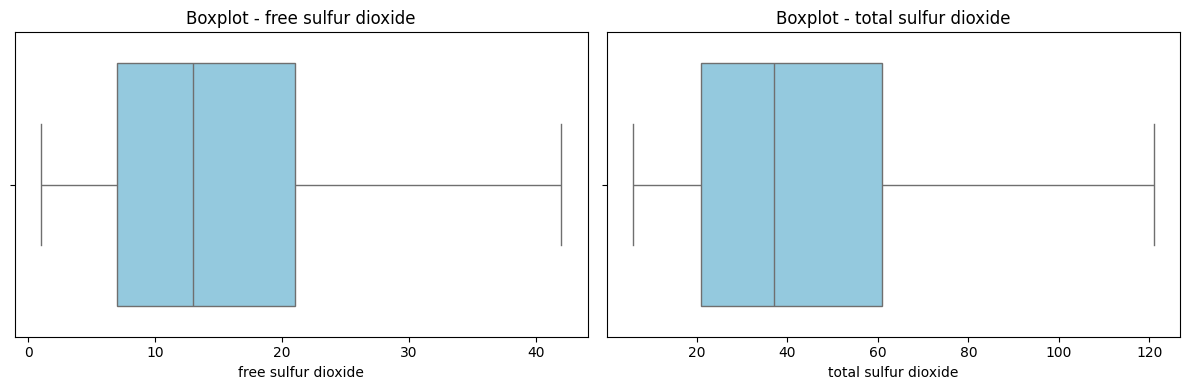

In [113]:
# Grafico con boxplots para ver como quedan los datos despues de hacer capping

plt.figure(figsize=(12, 4))
for i, col in enumerate(columnas_problematicas):
    plt.subplot(1, len(columnas_problematicas), i + 1)
    sns.boxplot(x=df_tratado_selectivo[col], color='skyblue')
    plt.title(f'Boxplot - {col}')
plt.tight_layout()
plt.show()

* Ahora observamos que ya no hay datos outliers, por lo que están tratados de manera correcta mis datos en estas columnas, esto fué necesario para luego proceder a tratarlos y ver si son utiles para elaborar mis modelos.

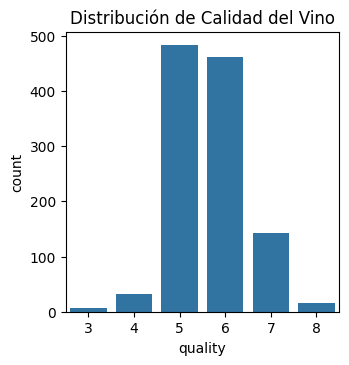

In [114]:
# Análisis de distribución Calidad del Vino
plt.figure(figsize=(12, 8))

# Distribución de calidad
plt.subplot(2, 3, 1)
sns.countplot(data=df, x='quality')
plt.title('Distribución de Calidad del Vino')
plt.show()

* A partir del set de datos podemos ver que la mayor cantidad respecto a la calidad de las muestras de vino se encuentran entre 5 y 6, lo que corresponde a vinos de calidad media, ya que este parámetro va de 0 a 10.

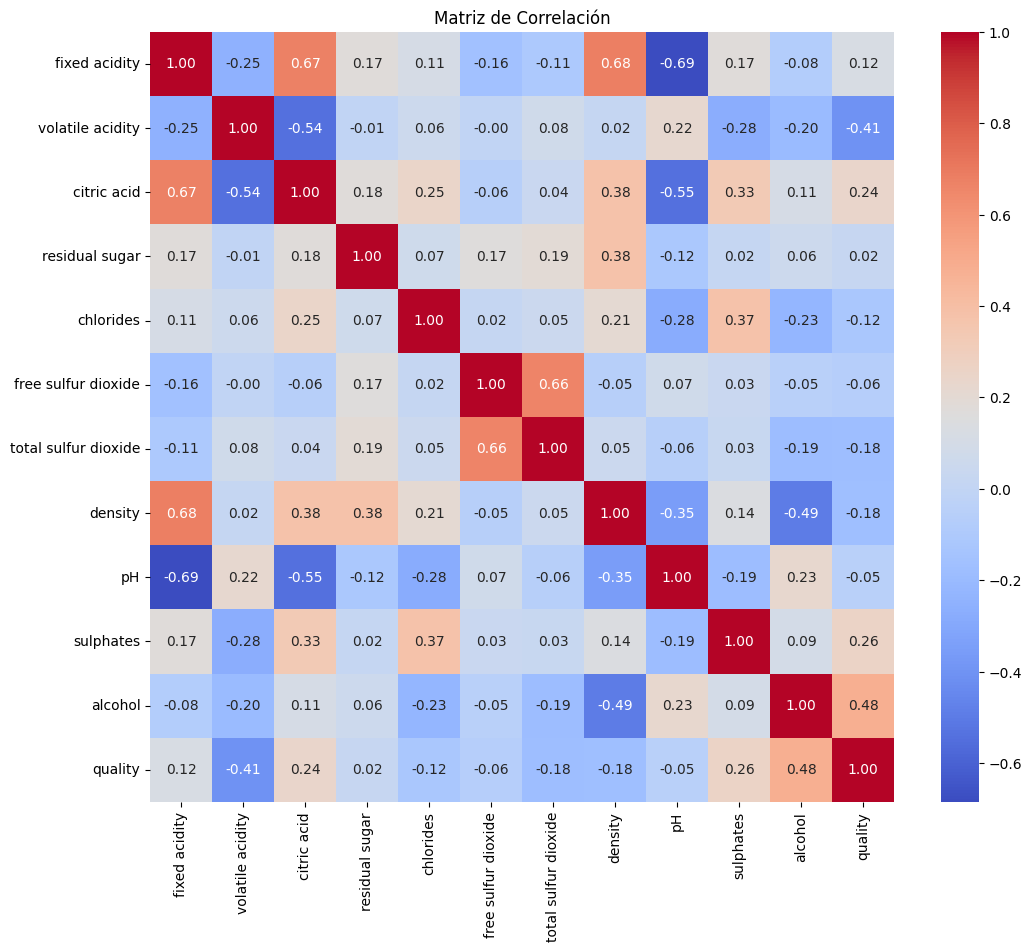

In [115]:
# Realizo una matriz de correlación para ver qué variables tienen mayor relación con quality.

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlación")
plt.show()

* Se observa que las variables más significativas respecto a correlación son: "alcohol" que tiene 0.48, le sigue "sulphates" con 0.26, "citric acid con 0.24" y finalmente "fixed acidity" con 0.12.

 # ML

In [125]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

columna_features = ['alcohol', 'sulphates', 'citric acid', 'fixed acidity']
X = df[columna_features]
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

models_params = {
    'knn': {
        'model': KNeighborsClassifier(),
        'params': {
            'knn__n_neighbors': [3, 5, 7],
            'knn__weights': ['uniform', 'distance']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'rf__n_estimators': [50, 100],
            'rf__max_depth': [None, 5, 10]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(max_iter=1000, random_state=42),
        'params': {
            'logistic_regression__C': [0.1, 1, 10],
            'logistic_regression__solver': ['lbfgs']
        }
    }
}

best_models = {}

for name, mp in models_params.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        (name if name != 'random_forest' else 'rf', mp['model'])
    ])

    grid = GridSearchCV(pipe, mp['params'], cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)

    best_models[name] = grid.best_estimator_

    print(f"{name} - Score CV: {grid.best_score_:.4f}")

for name, model in best_models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} - Accuracy: {acc:.4f}")

knn - Score CV: 0.6203
random_forest - Score CV: 0.6269
logistic_regression - Score CV: 0.5689
knn - Accuracy: 0.6594
random_forest - Accuracy: 0.6638
logistic_regression - Accuracy: 0.6157


# CONCLUSIONES:
 Luego de revisar los datos obtenidos de los tres modelos se concluye que:
 * Random Forest es el mejor modelo, ya que tiene el mayor score de validación cruzada (62.7%) y también la mejor precisión en test accuracy= 66.4%.

* En el caso de KNN tuvo valores muy cercanos, es bastante competitivo, ya que se observa que tiene un desempeño similar al de Random forest (62% CV, 66% Accuracy).

* Finalmente Regresión Logística quedó un poco más atrás, lo que puede ser porque la relación no es estrictamente lineal